https://towardsdatascience.com/cheat-sheet-for-python-dataframe-r-dataframe-syntax-conversions-450f656b44ca

https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/

Manipulação de datas em R: https://rpubs.com/phsg13/534878

Manipulação de strings em R: https://www.gastonsanchez.com/r4strings/

# 0.0 - Library Imports

In [63]:
install.packages("fueleconomy")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
library(dplyr, caret)

library(fueleconomy)

# 1.0 - Loading & Checking Dataset

Descrição dos dados:

* id: Um identificador único para cada veículo.

* make: O fabricante do veículo.

* model: O modelo específico do veículo.

* year: O ano do veículo.

* class: A classe do veículo (variável categórica o rdinal).

* trans: O tipo de transmissão do veículo.

* drive: O tipo de tração do veículo (por exemplo, d ianteira, traseira, integral).

* cyl: O número de cilindros no motor do veículo.

* displ: O deslocamento do motor do veículo em litros.

* fuel: O tipo de combustível usado pelo veículo.
* hwy: O consumo de combustível na estrada em MPG.

* cty: O consumo de combustível na cidade em MPG.

In [65]:
# Loading dataset

data(vehicles)

df <- data.frame(vehicles)

head(df)


,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
2,13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
3,13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
4,14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
5,14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
6,14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


In [66]:
# Data dimensions

dim(df)

[1] 33442    12

In [67]:
# Data dimensions

paste("O numero de linhas é:", dim(df)[1])

paste("O numero de colunas é:", dim(df)[2])

[1] "O numero de linhas é: 33442"

[1] "O numero de colunas é: 12"

In [68]:
sprintf(" O número de linhas é: %s", dim(df)[1])

sprintf(" O número de colunas é: %s", dim(df)[2])

[1] " O número de linhas é: 33442"

[1] " O número de colunas é: 12"

In [69]:
# Data types

df_dtypes <- data.frame(sapply(df, typeof))

df_dtypes <- rename(df_dtypes, c('data_type'='sapply.df..typeof.')) # renomear coluna do dataframe

df_dtypes

,data_type
,<chr>
id,double
make,character
model,character
year,double
class,character
trans,character
drive,character
cyl,double
displ,double


In [70]:
# Verificando NA's

sum(is.na(df))


[1] 123

In [71]:
# Valores faltantes

data.frame(colSums(is.na(df)))

,colSums.is.na.df..
,<dbl>
id,0
make,0
model,0
year,0
class,0
trans,8
drive,0
cyl,58
displ,57


In [72]:
# Valores faltantes: print via loop for

cat('Number of missing:\n')

for (i in seq(1:length(colnames(df)))){
    print(sprintf("%s: %s", colnames(df)[i],sum(is.na(df[,i]))))
    }

Number of missing:
[1] "id: 0"
[1] "make: 0"
[1] "model: 0"
[1] "year: 0"
[1] "class: 0"
[1] "trans: 8"
[1] "drive: 0"
[1] "cyl: 58"
[1] "displ: 57"
[1] "fuel: 0"
[1] "hwy: 0"
[1] "cty: 0"


In [73]:
# % de missing

data.frame(colSums(is.na(df)/dim(df)[1]))

,colSums.is.na.df..dim.df..1..
,<dbl>
id,0.0000000000
make,0.0000000000
model,0.0000000000
year,0.0000000000
class,0.0000000000
trans,0.0002392201
drive,0.0000000000
cyl,0.0017343460
displ,0.0017044435


In [74]:
# Linhas duplicadas

sum(duplicated(df))

[1] 0

# 2.0 - Data handling

In [75]:
# Dropar NA's

## temos poucos missing, então dropar as linhas

df <- unique(df)

In [76]:
# Adjusting data types


# "year": ano como fator ordenado
df$year <- factor(as.integer(df$year), ordered = TRUE, levels = c(sort(unique(df$year))))

# "class": fator ordenado da classe do veículo -> do menor para o maior tamanho
df$class <- factor(df$class, ordered = TRUE,
                  levels = c("Subcompact Cars", "Minicompact Cars", "Small Station Wagons",
                             "Vans, Cargo Type", "Vans, Passenger Type", "Standard Pickup Trucks 2WD",
                             "Standard Pickup Trucks/2wd", "Small Pickup Trucks 2WD",
                             "Standard Pickup Trucks 4WD", "Small Pickup Trucks 4WD",
                             "Special Purpose Vehicles/2wd", "Special Purpose Vehicles/4wd",
                             "Two Seaters", "Special Purpose Vehicle 2WD", "Midsize-Large Station Wagons",
                             "Midsize Station Wagons", "Large Cars", "Sport Utility Vehicle - 4WD",
                             "Small Sport Utility Vehicle 2WD", "Small Sport Utility Vehicle 4WD",
                             "Standard Sport Utility Vehicle 2WD", "Standard Sport Utility Vehicle 4WD",
                             "Vans Passenger", "Special Purpose Vehicle")  )

# "trans" (transmissão) -> ordenado do menor para a maior quantidade de marchas
# LEMBRETE: FAZER O FEATURE ENGINEERING A PARTIR DA COLUNA TRANS EXTRAINDO MANUAL OU AUT DO CAMBIO
df$trans <- factor(df$trans, ordered = TRUE,
                  levels = c("Manual 3-spd", "Automatic 3-spd", "Manual 4-spd", "Automatic 4-spd",
                             "Manual 5-spd", "Automatic (S4)", "Automatic (AM5)", "Automatic (L3)",
                             "Automatic (AM-S6)", "Automatic (A1)", "Automatic (AV)"))


# "drive" (tração) -> odenado por complexidade do sistema de tração
df$drive <- factor(df$drive, ordered = TRUE,
                  levels = c("2-Wheel Drive", "Front-Wheel Drive", "Rear-Wheel Drive",
                             "4-Wheel Drive", "All-Wheel Drive", "4-Wheel or All-Wheel Drive",
                             "Part-time 4-Wheel Drive"))


# "fuel" (combustível) -> será ordenado do menor para o maior consumo de combustível
df$fuel <- factor(df$fuel, ordered = TRUE,
                  levels = c("Regular", "Midgrade", "Premium", "Premium or E85",
                             "Gasoline or E85", "Premium Gas or Electricity",
                             "Gasoline or natural gas", "CNG","Regular Gas and Electricity",
                             "Gasoline or propane", "Premium and Electricity", "Diesel"))

# "make" -> fator
df$make <- factor(df$make)

# "model" -> fator
df$model <- factor(df$model)

# "cyl" -> integer
df$cyl <- as.integer(df$cyl)

# "hwy" -> integer
df$hwy <- as.integer(df$hwy)

# "cty" -> integer
df$cty <- as.integer(df$cty)

In [78]:
summary(df)

       id               make                     model            year      
 Min.   :    1   Chevrolet: 3458   F150 Pickup 2WD  :  201   1985   : 1699  
 1st Qu.: 8346   Ford     : 2796   Truck 2WD        :  187   1987   : 1247  
 Median :16694   Dodge    : 2349   F150 Pickup 4WD  :  180   1986   : 1209  
 Mean   :17013   GMC      : 2264   Ranger Pickup 2WD:  164   2014   : 1202  
 3rd Qu.:25226   Toyota   : 1720   Mustang          :  154   2008   : 1186  
 Max.   :34932   BMW      : 1394   Jetta            :  150   2009   : 1184  
                 (Other)  :19401   (Other)          :32346   (Other):25655  
                         class                   trans      
 Subcompact Cars            : 4176   Automatic 4-spd:10771  
 Sport Utility Vehicle - 4WD: 2091   Manual 5-spd   : 7855  
 Two Seaters                : 1595   Automatic 3-spd: 2720  
 Large Cars                 : 1527   Manual 4-spd   : 1368  
 Small Station Wagons       : 1293   Automatic (S4) :  232  
 (Other)          

In [ ]:
# pedir para o Bard sugestões de feature engineering com esse conjunto de dados

# 3.0 EDA

In [ ]:
# usar ggplot 2 nas visualizações

# fazer boxplots (das categorias em drive usando o consumo)

# fazer scatterplot (gráfico de pontos) Ano X Consumo de combustível

# fazer um heatmap de correlações para as variáveis numéricas

# fazer o heatmap de correlação de variáveis categóricas

# procurar o equivalente do seaborn pairplot no R

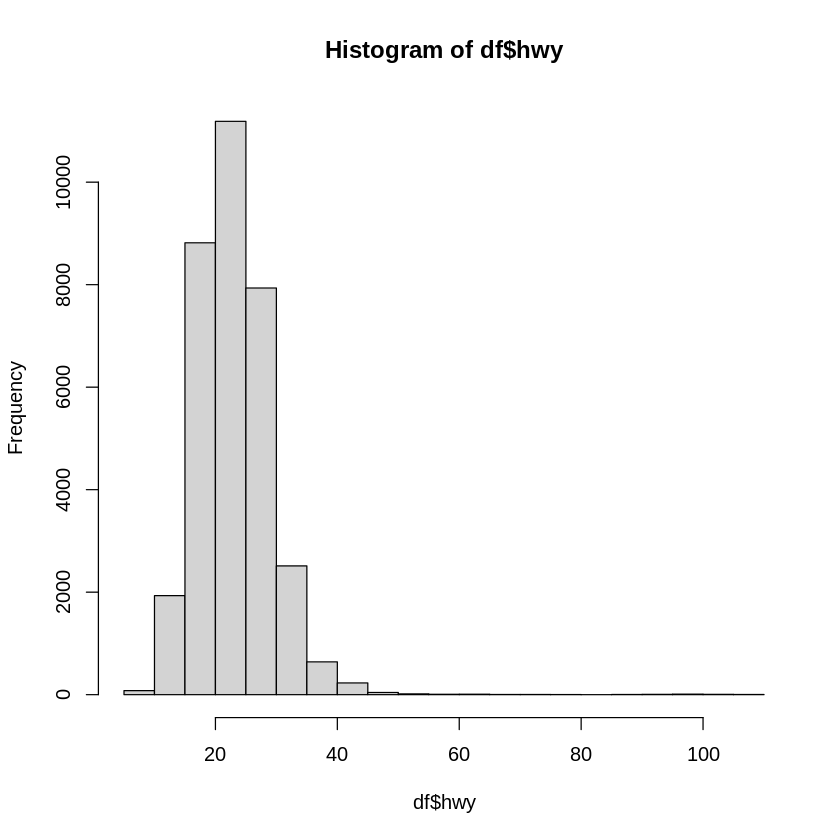

In [ ]:
hist(df$hwy)

# 4.0 Data preparation

In [ ]:
# renomear colunas para o português (para praticar o comando de renomear)

# fazer o split de treino e teste usando o caret

# utilizar os scalers do pacote caret

In [ ]:
# ============ Split de treino e teste do caret ==================


## Crie um dataframe
#df <- data.frame(
#  id = c(1, 2, 3, 4, 5),
#  x = c(1, 2, 3, 4, 5),
#  y = c(6, 7, 8, 9, 10)
#)
#
## Divida os dados em treino e teste
#trainIndex <- createDataPartition(df$y, p = 0.75, list = FALSE)
#
## Crie os conjuntos de treino e teste
#trainSet <- df[trainIndex,]
#testSet <- df[-trainIndex,]
#

# 5.0 Modeling

In [ ]:
# aplicar diferentes algoritmos de regressão

# avaliar as metricas MAPE, RMSE e R2

# utilizar valores de SHAP

In [ ]:
# Exemplo -> value_counts() do Python no R

table(df$Petal.Width)


0.1 0.2 0.3 0.4 0.5 0.6   1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9   2 2.1 2.2 2.3 
  5  29   7   7   1   1   7   3   5  13   8  12   4   2  12   5   6   6   3   8 
2.4 2.5 
  3   3 

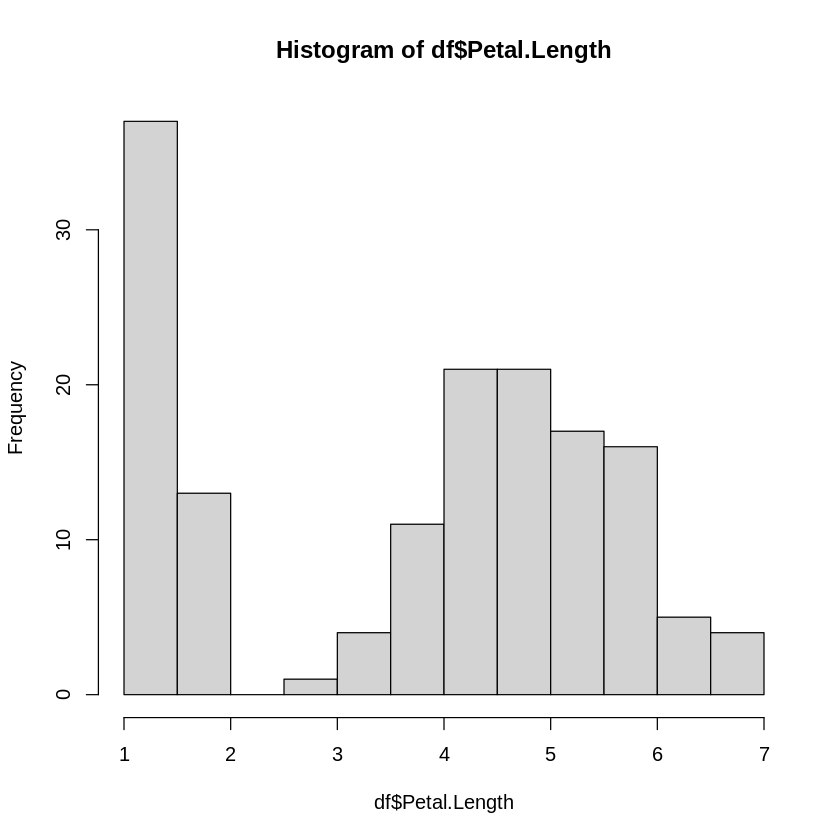

In [ ]:
hist(df$Petal.Length)

# Anotações

Existem várias oportunidades interessantes de projetos de ciência de dados que você pode explorar com o conjunto de dados "vehicles" do pacote "fueleconomy". Aqui estão algumas sugestões:

* Predição de Consumo de Combustível: Crie um modelo de regressão para prever o consumo de combustível de um veículo com base em suas características, como ano, classe, número de cilindros, deslocamento do motor, tipo de combustível, etc. Isso pode ajudar os consumidores a entenderem melhor o consumo de combustível de um veículo antes da compra.

* Classificação de Classe de Veículo: Desenvolva um modelo de classificação para prever a classe de um veículo com base em seus atributos, como ano, tipo de transmissão, tração, número de cilindros, etc. Isso pode ajudar a categorizar os veículos de forma automática.

* Predição de Emissões de CO2: Crie um modelo de regressão para prever as emissões de CO2 de um veículo com base em suas características. Isso pode ser útil para entender as emissões de veículos diferentes e seu impacto ambiental.

* Análise de Eficiência de Combustível ao Longo do Tempo: Explore como a eficiência de combustível de diferentes classes de veículos mudou ao longo dos anos. Isso pode envolver a criação de gráficos de tendência e análises estatísticas.

* Comparação de Consumo de Combustível entre Tipos de Transmissão: Compare o consumo de combustível entre diferentes tipos de transmissão (automática, manual, etc.) para determinar se há uma diferença significativa na eficiência de combustível.

* Clusterização de Veículos por Eficiência de Combustível: Use algoritmos de clusterização para agrupar veículos com base em sua eficiência de combustível. Isso pode revelar padrões interessantes de grupos de veículos com características semelhantes de consumo de combustível.

* Previsão de Valor Econômico de Veículos Usados: Crie um modelo para prever o valor econômico de veículos usados com base em suas características e eficiência de combustível. Isso pode ser útil para compradores e vendedores de carros usados.

* Lembre-se de que, ao realizar qualquer projeto de ciência de dados, é importante seguir um processo sistemático, incluindo a preparação de dados, a seleção de recursos relevantes, a criação de modelos, a avaliação e a interpretação dos resultados. Além disso, mantenha-se atualizado com as boas práticas de machine learning e ética na ciência de dad

# Rascunhos